In [1]:
#importing data using pandas
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\LENOVO\Desktop\SQL\Crime\CrimesOnWomenData.csv")
df=df.drop(columns=["Unnamed: 0"], errors='ignore')
df.head(5)

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,ASSAM,2001,817,1070,59,850,4,1248,0
3,BIHAR,2001,888,518,859,562,21,1558,83
4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


In [3]:
#Group by Year and Sum of the Crimes
year_trend=df.groupby("Year").sum(numeric_only=True)

In [4]:
#Crime Columns to plot
crime_columns=['Rape', 'K&A' , 'DD' , 'AoW' , 'AoM' , 'DV']

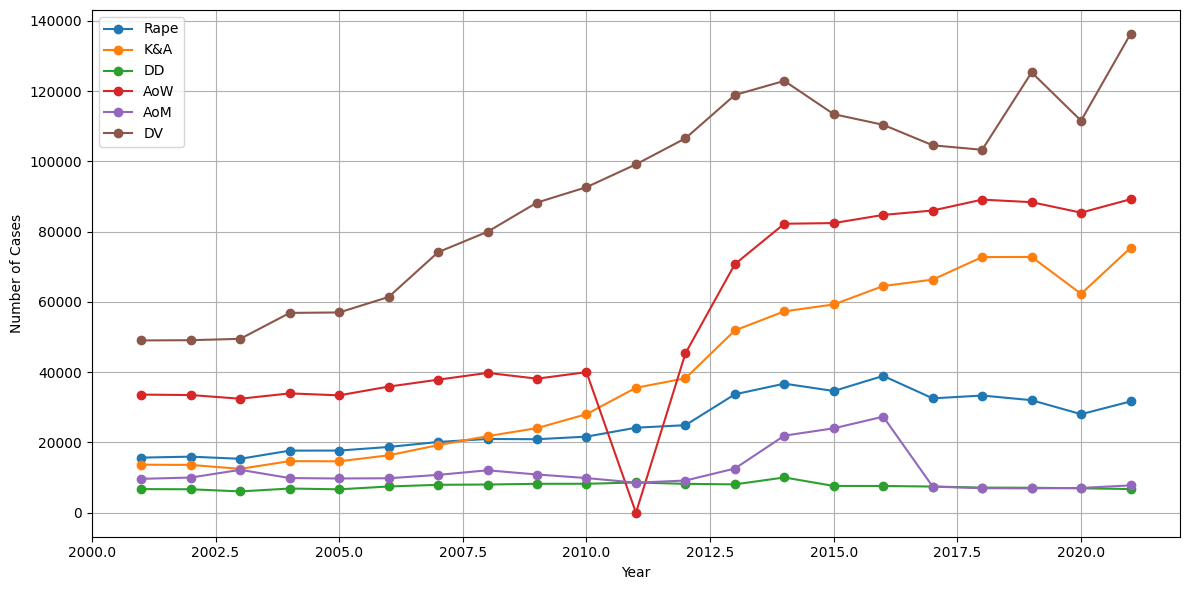

In [5]:
#Plotting figure
plt.figure(figsize=(12,6))
for col in crime_columns:
    plt.plot(year_trend.index, year_trend[col], marker='o',label=col)
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
#Calculationg and visualizing the proportion of each crime category contributing to total crimes using pie chart or stacked bar charts.
#Total Crime per Category.
#Which Crime Types are most prevalent over the year.
#Great visual for a report or dashboard.
total_crimes_by_category=df[crime_columns].sum().sort_values(ascending=False)

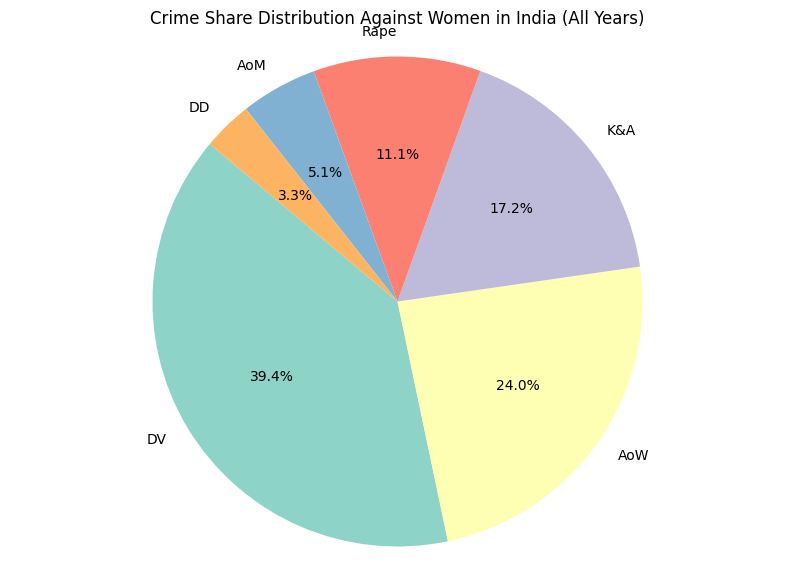

In [7]:
plt.figure(figsize=(10,7))
plt.pie(
    total_crimes_by_category,
    labels=total_crimes_by_category.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors
)
plt.title("Crime Share Distribution Against Women in India (All Years)")
plt.axis('equal')
plt.show()

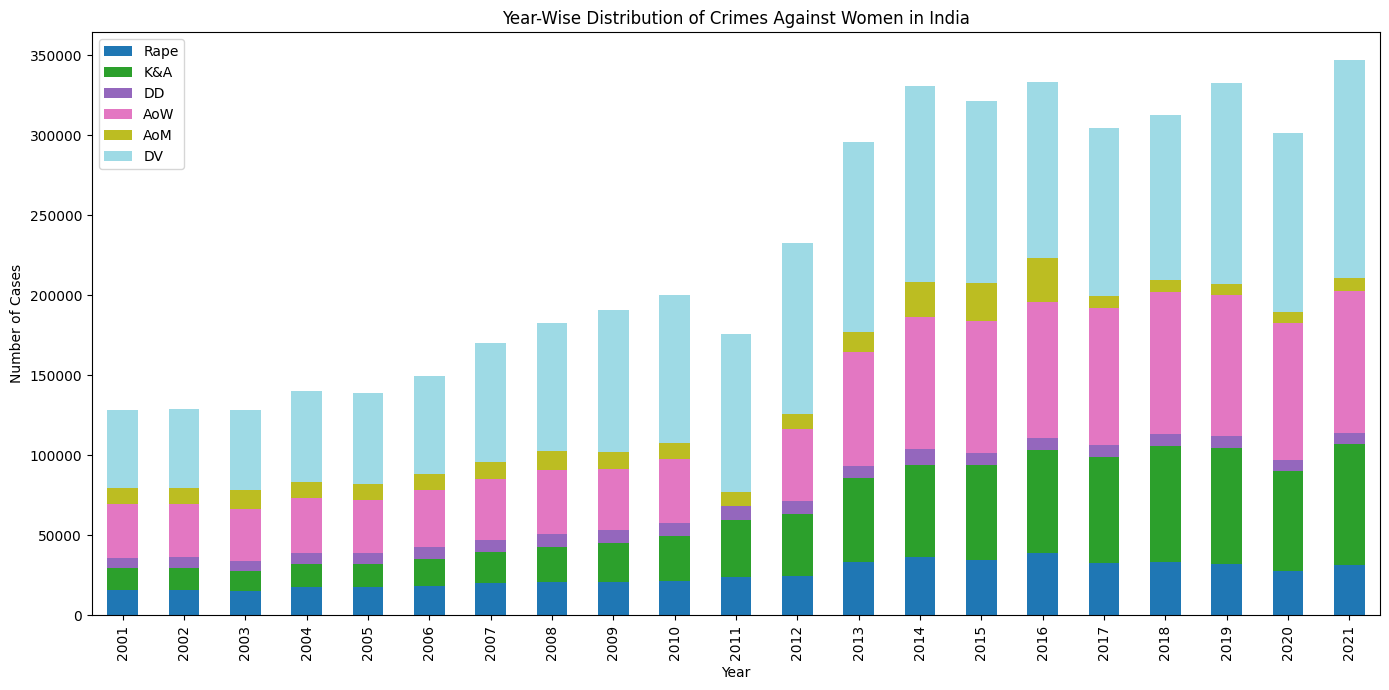

In [8]:
year_data=df.groupby("Year")[crime_columns].sum()
year_data.plot(kind='bar', stacked=True, figsize=(14,7), colormap='tab20')
plt.title("Year-Wise Distribution of Crimes Against Women in India")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19840\3088909228.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, 'Total_Crimes'))


<Figure size 1400x700 with 0 Axes>

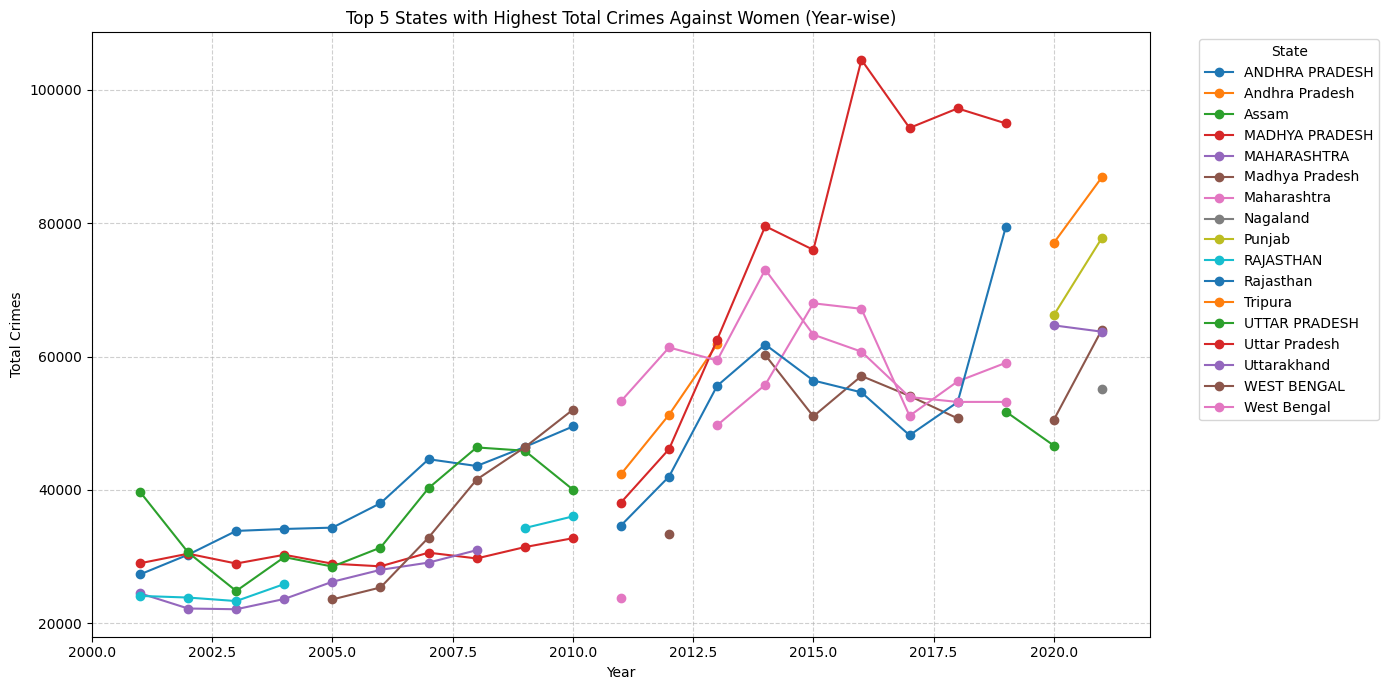

In [15]:
# --- Top Dangerous States Over Time ----------------------------------
# Identify the 5 states with the highest total crimes each year
# and visualize their year‑to‑year changes.
# ---------------------------------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt

# 3) Compute a Total_Crimes column
crime_cols = df.columns.difference(['State', 'Year'])
df['Total_Crimes'] = df[crime_cols].sum(axis=1)

# 4) For each year, keep only the 5 states with the highest total crimes
top5_each_year = (
    df.groupby('Year', group_keys=False)
      .apply(lambda x: x.nlargest(5, 'Total_Crimes'))
      .reset_index(drop=True)
)

# 5) Pivot so each state’s totals sit in their own column (good for plotting)
pivot_df = top5_each_year.pivot(index='Year', columns='State', values='Total_Crimes')

# 6) Plot
plt.figure(figsize=(14, 7))
pivot_df.plot(marker='o', figsize=(14, 7))
plt.title('Top 5 States with Highest Total Crimes Against Women (Year‑wise)')
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='State', bbox_to_anchor=(1.04, 1), loc='upper left')
plt.tight_layout()
plt.show()
